In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
img = cv.imread('bloques1.jpg')

imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Binarizamos con Otzu
ret, img_bin = cv.threshold(imgray,30,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

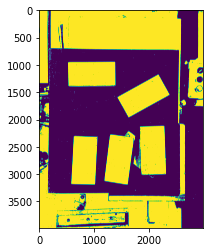

In [4]:
plt.imshow(img_bin)
plt.show()

### Cálculo

El cálculo de contornos tiene un parámetro obligatorio de modo:

- cv.RETR_LIST: Contornos sin relación de jerarquías
- cv.RETR_CCOMP: Contornos con dos niveles de jerarquía --> Contorno externos y contornos internos
- cv.RETR_TREE: Mapeo completo de jerarquías, inclusive para contornos anidados.

Y un parámetro optativo de método:

- cv.CHAIN_APPROX_NONE: Devuelve todos los puntos del contorno
- cv.CHAIN_APPROX_SIMPLE: Comprime los segmentos horizontales y verticales (devuelve solo los extremos)
- cv.CHAIN_APPROX_TC89_L1: Aproximación según el algoritmo de Ten-Chin
- cv.CHAIN_APPROX_TC89_KCOS: Aproximación según el algoritmo de Ten-Chin


In [16]:
# Recorto la imagen:

img_cut = img_bin[720:3300, 210:2500]

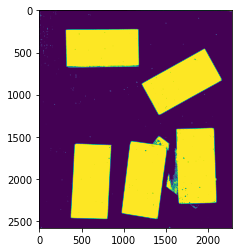

In [17]:
plt.imshow(img_cut)
plt.show()

In [50]:
# Calculamos los contornos y le agrego el offset de los contornos
#contours, hierarchy = cv.findContours(img_cut, cv.RETR_TREE, cv.CHAIN_APPROX_NONE, offset=(210,720))
contours, hierarchy = cv.findContours(img_cut, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE, offset=(210,720))

# Me fijo cuántos contornos se encontraron
print(len(contours))

1209


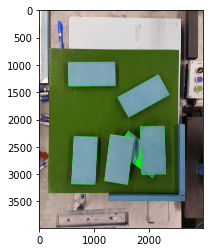

In [19]:
# Dibujamos todos los contornos (indicado con el -1)
#---------------------------------------------------
img_out = img.copy()
cv.drawContours(img_out, contours, -1, (0,255,0), 3)
plt.imshow(img_out)
plt.show()


In [53]:
bloque_contours = []
for c in contours:
    if cv.contourArea(c) < 100000:
        continue
    bloque_contours.append(c)
    
print(len(bloque_contours))

for i in range(len(bloque_contours)):
    cnt = bloque_contours[i]
    area = cv.contourArea(cnt)
    long = cv.arcLength(cnt, False)
    print(cnt[0], cnt[-1])
    print('{} - Longitud: {} - Área: {}'.format(i, long, area))

5
[[ 654 2302]] [[ 669 2302]]
0 - Longitud: 2693.180800676346 - Área: 380638.0
[[1631 2211]] [[1634 2211]]
1 - Longitud: 3047.996157169342 - Área: 391265.5
[[2222 2116]] [[2264 2116]]
2 - Longitud: 5438.70002746582 - Área: 416024.5
[[2170 1179]] [[2174 1179]]
3 - Longitud: 2736.8968625068665 - Área: 365721.5
[[1247  946]] [[1248  947]]
4 - Longitud: 3210.721992611885 - Área: 380440.0


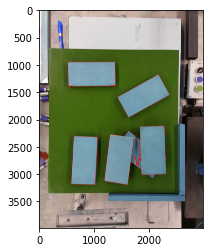

In [44]:
# Dibujamos todos los contornos (indicado con el -1)
#---------------------------------------------------
img_out = img.copy()
cv.drawContours(img_out, bloque_contours, -1, (255,0,0), 3)
plt.imshow(img_out)
plt.show()

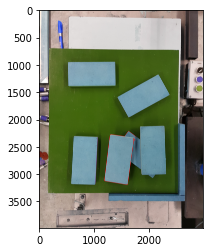

In [46]:
img_out = img.copy()
cv.drawContours(img_out, bloque_contours, 1, (255,0,0), 3)
plt.imshow(img_out)
plt.show()